In [611]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from statsmodels.tsa.arima.model import ARIMA

# Carregar o dataset
df = pd.read_csv('BTC_Historic_Dolar_Prices.csv')

# Visualizar os primeiros dados
print(df.head())

# Verificar valores nulos
print(df.isnull().sum())

# Remover as linhas com qualquer valor nulo
df = df.dropna()

    timestamp     close PriceOneYearAgo PriceSixMonthsAgo PriceThreeMonthsAgo  \
0  2024-11-16  90558,47        36154,76          65231,58            58894,10   
1  2024-11-15  91066,00        37880,58          66267,49            57560,09   
2  2024-11-14  87250,43        35537,64          61552,79            58737,27   
3  2024-11-13  90584,16        36502,35          62901,44            60609,56   
4  2024-11-12  87955,80        37054,52          61448,39            59354,51   

  PriceOneMonthAgo PriceTwoWeeksAgo PriceOneWeekAgo  
0         67612,72         69289,27        76778,86  
1         67041,10         69482,46        76545,47  
2         66046,12         70215,18        75904,85  
3         62851,37         72339,54        75639,07  
4         63193,02         72720,49        69359,56  
timestamp                0
close                    0
PriceOneYearAgo        366
PriceSixMonthsAgo      184
PriceThreeMonthsAgo     92
PriceOneMonthAgo        31
PriceTwoWeeksAgo        14


Converting all columns to float and replacing ',' with '.'

In [612]:
numeric_columns = ['PriceOneYearAgo', 'PriceSixMonthsAgo', 'PriceThreeMonthsAgo',
        'PriceOneMonthAgo', 'PriceTwoWeeksAgo', 'PriceOneWeekAgo', 'close']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '.').astype(float)

In [613]:
# Visualizar os primeiros dados
print(df.head())

    timestamp     close  PriceOneYearAgo  PriceSixMonthsAgo  \
0  2024-11-16  90558.47         36154.76           65231.58   
1  2024-11-15  91066.00         37880.58           66267.49   
2  2024-11-14  87250.43         35537.64           61552.79   
3  2024-11-13  90584.16         36502.35           62901.44   
4  2024-11-12  87955.80         37054.52           61448.39   

   PriceThreeMonthsAgo  PriceOneMonthAgo  PriceTwoWeeksAgo  PriceOneWeekAgo  
0             58894.10          67612.72          69289.27         76778.86  
1             57560.09          67041.10          69482.46         76545.47  
2             58737.27          66046.12          70215.18         75904.85  
3             60609.56          62851.37          72339.54         75639.07  
4             59354.51          63193.02          72720.49         69359.56  


In [614]:
# Conversão de datas (se houver uma coluna de data)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Timestamp'] = df['Date'].astype(int)  # Criar uma representação numérica da data

# Selecionar variáveis explicativas (X) e variável alvo (y)
X = df[['PriceOneYearAgo', 'PriceSixMonthsAgo', 'PriceThreeMonthsAgo',
        'PriceOneMonthAgo', 'PriceTwoWeeksAgo', 'PriceOneWeekAgo']]
y = df['close']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

**TRAINING THE MODEL**

Linear Regression Algorithm

In [615]:
# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
# Calcular o MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Calcular o MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Calcular o R² (R-squared)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 12640921.2753
Mean Absolute Error (MAE): 2932.4306
R² Score: 0.3806


Results

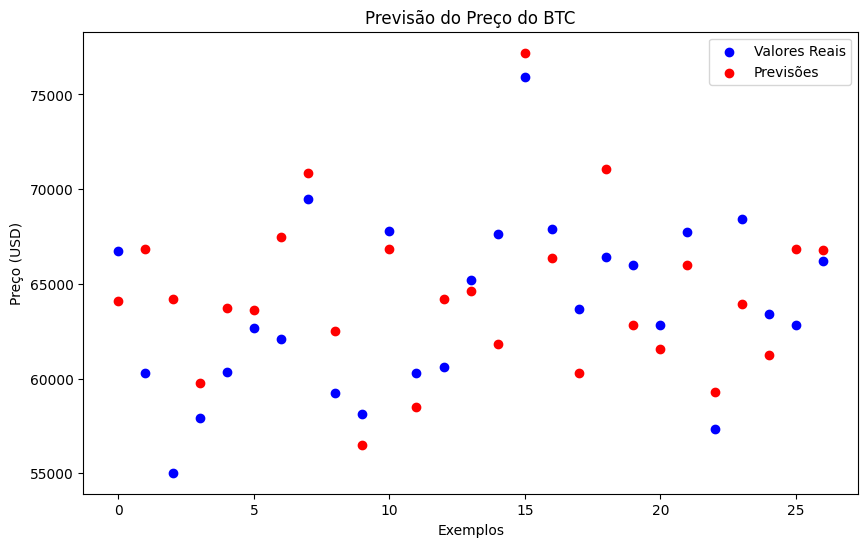

In [616]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores Reais')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Previsões')
plt.legend()
plt.title('Previsão do Preço do BTC')
plt.xlabel('Exemplos')
plt.ylabel('Preço (USD)')
plt.show()

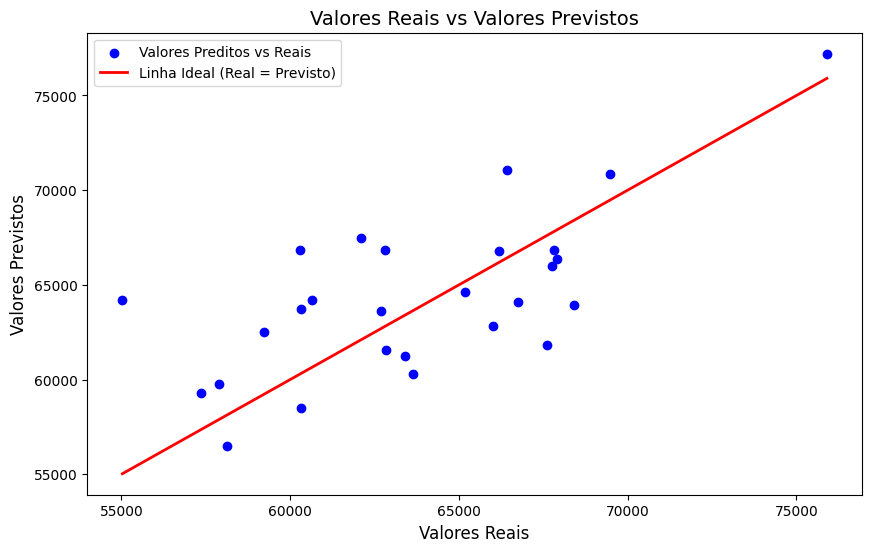

In [617]:
# Plotando o gráfico de valores reais x valores previstos
plt.figure(figsize=(10, 6))

# Scatter plot para comparar valores reais e previstos
plt.scatter(y_test, y_pred, color='blue', label='Valores Preditos vs Reais')

# Linha de 1:1 para representar onde os valores reais seriam iguais aos previstos
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Linha Ideal (Real = Previsto)')

# Títulos e rótulos
plt.title('Valores Reais vs Valores Previstos', fontsize=14)
plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Valores Previstos', fontsize=12)

# Exibir a legenda
plt.legend()

# Exibir o gráfico
plt.show()

Neural Network Training

In [618]:
# Normalização dos dados (escala entre 0 e 1)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Construir o modelo de rede neural
model = Sequential()

# Adicionar camadas à rede neural
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Primeira camada oculta
model.add(Dense(32, activation='relu'))  # Segunda camada oculta
model.add(Dense(1))  # Camada de saída (valor contínuo de fechamento)

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Resumo do modelo
model.summary()

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
# Calcular o MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Calcular o MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Calcular o R² (R-squared)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_180 (Dense)                    │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2547 - val_loss: 0.1364
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1262 - val_loss: 0.0604
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0709 - val_loss: 0.0249
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0461 - val_loss: 0.0133
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0279 - val_loss: 0.0129
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0286 - val_loss: 0.0151
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0267 - val_loss: 0.0155
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0310 - val_loss: 0.0142
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0225 - val_loss: 0.0124
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0221 - val_loss: 0.0112
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0202 - val_loss: 0.0104
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0249 - val_loss: 0.0101
Epoch 13/50

Results

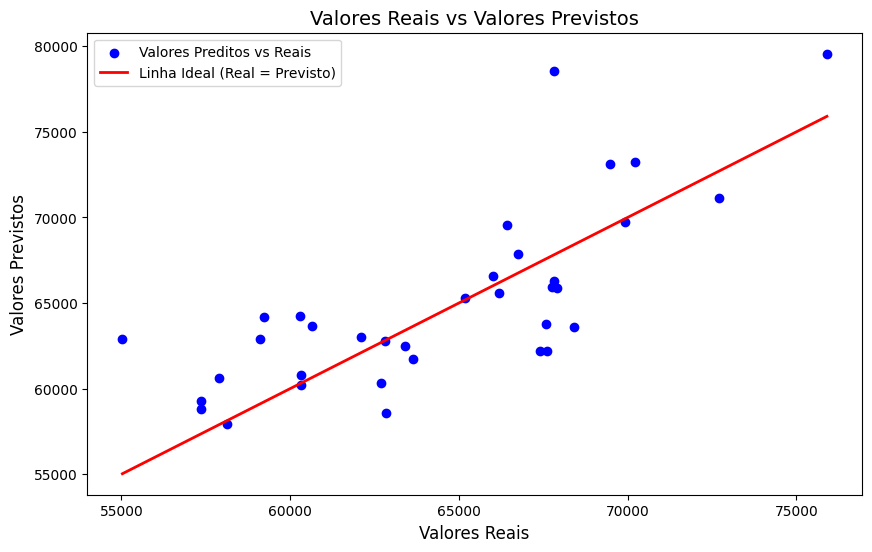

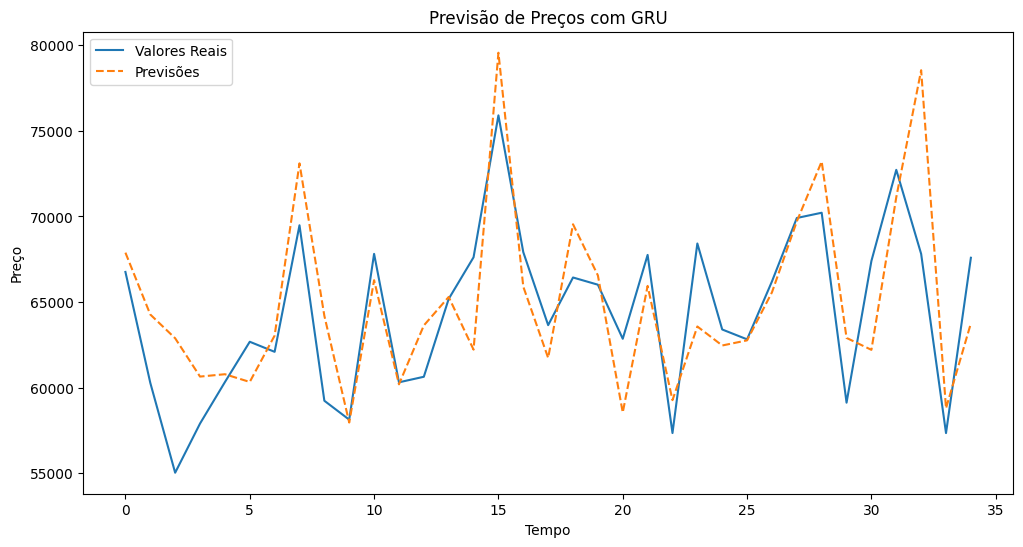

In [619]:
# Reverter a normalização dos dados previstos (valores de y_pred)
y_pred = scaler_y.inverse_transform(np.hstack((y_pred, np.zeros((y_pred.shape[0], X_scaled.shape[1] - 1)))))[:, 0]

# Reverter a normalização dos dados reais de y_test
y_test = scaler_y.inverse_transform(np.hstack((y_test, np.zeros((y_test.shape[0], X_scaled.shape[1] - 1)))))[:, 0]

# Visualizar os resultados

# Plotando o gráfico de valores reais x valores previstos
plt.figure(figsize=(10, 6))

# Scatter plot para comparar valores reais e previstos
plt.scatter(y_test, y_pred, color='blue', label='Valores Preditos vs Reais')

# Linha de 1:1 para representar onde os valores reais seriam iguais aos previstos
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Linha Ideal (Real = Previsto)')

# Títulos e rótulos
plt.title('Valores Reais vs Valores Previstos', fontsize=14)
plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Valores Previstos', fontsize=12)

# Exibir a legenda
plt.legend()

# Exibir o gráfico
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsões', linestyle='dashed')
plt.title('Previsão de Preços com GRU')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()